In [1]:
import warnings
warnings.filterwarnings("ignore")
import vaex as vx
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
columns=['NU_INSCRICAO',
         'SG_UF_RESIDENCIA',
         'NU_IDADE',
         'TP_SEXO',
         'TP_ESTADO_CIVIL',
         'NU_NOTA_LC',
         'NU_NOTA_MT',
         'NU_NOTA_REDACAO',
         'TP_ESCOLA',
         'TP_ST_CONCLUSAO',
         'Q001',
         'Q002',
         'Q005',
         'Q006',
         'Q024',
         'Q025',
         ]

In [3]:
data = vx.read_csv('MICRODADOS_ENEM_2019.csv',sep=';', usecols=columns)

In [4]:
data.head()

#,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,1.90001e+11,PA,21,M,1,1,1,497.3,369.1,780,D,E,7,B,B,A
1,1.90001e+11,PA,16,F,1,3,1,482.3,416.5,600,D,E,5,B,A,A
2,1.90001e+11,PA,18,F,1,2,3,582.6,571.5,640,H,E,3,C,C,B
3,1.90001e+11,PA,23,M,0,2,2,nan,nan,nan,D,D,3,C,A,A
4,1.90001e+11,PA,23,M,1,1,1,nan,nan,nan,B,C,5,C,A,A
5,1.90001e+11,PA,31,M,1,1,1,582,605.3,580,C,C,5,C,A,A
6,1.90001e+11,PA,30,F,2,1,1,464.3,581.5,360,B,B,4,C,A,B
7,1.90001e+11,PA,26,F,0,2,2,395.6,473.8,480,B,B,4,B,A,A
8,1.90001e+11,PA,19,M,1,1,1,354.2,375.5,460,D,D,4,B,A,B
9,1.90001e+11,PA,17,F,1,3,1,515.3,397,540,E,E,4,B,A,A


Os números de média, máximo e mínimo parecem não trazer diferenças relevantes entre as notas dos candidatos em realação ao sexo.

# Redação

In [5]:
data['TP_SEXO','NU_NOTA_REDACAO'].groupby('TP_SEXO', vx.agg.max), data.filter(data.NU_NOTA_REDACAO > 0)['TP_SEXO','NU_NOTA_REDACAO'].groupby('TP_SEXO', vx.agg.min), data['TP_SEXO','NU_NOTA_REDACAO'].groupby('TP_SEXO', vx.agg.mean)

(  #  TP_SEXO      NU_NOTA_REDACAO_max
   0  M                           1000
   1  F                           1000,
   #  TP_SEXO      NU_NOTA_REDACAO_min
   0  M                             40
   1  F                             40,
   #  TP_SEXO      NU_NOTA_REDACAO_mean
   0  F                         577.159
   1  M                         562.396)

# Matemática

In [6]:
data['TP_SEXO','NU_NOTA_MT'].groupby('TP_SEXO', vx.agg.max), data.filter(data.NU_NOTA_MT > 0)['TP_SEXO','NU_NOTA_MT'].groupby('TP_SEXO', vx.agg.min), data['TP_SEXO','NU_NOTA_MT'].groupby('TP_SEXO', vx.agg.mean)

(  #  TP_SEXO      NU_NOTA_MT_max
   0  M                     985.5
   1  F                     985,
   #  TP_SEXO      NU_NOTA_MT_min
   0  F                       359
   1  M                       359,
   #  TP_SEXO      NU_NOTA_MT_mean
   0  M                    547.975
   1  F                    506.167)

# Linguagens e Códigos

In [7]:
data['TP_SEXO','NU_NOTA_LC'].groupby('TP_SEXO', vx.agg.max), data.filter(data.NU_NOTA_LC > 0)['TP_SEXO','NU_NOTA_LC'].groupby('TP_SEXO', vx.agg.min), data['TP_SEXO','NU_NOTA_LC'].groupby('TP_SEXO', vx.agg.mean)

(  #  TP_SEXO      NU_NOTA_LC_max
   0  F                     801.7
   1  M                     801.7,
   #  TP_SEXO      NU_NOTA_LC_min
   0  F                       322
   1  M                       322,
   #  TP_SEXO      NU_NOTA_LC_mean
   0  F                    519.763
   1  M                    521.629)

In [8]:
#Traduzindo as respostas das questões sobre escolaridade dos pais
dic={'A':'Nunca estudou.',
     'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
     'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
     'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
     'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
     'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
     'G':'Completou a Pós-graduação.',
     'H':'Não sei.'}

def qus(v1):
    data[v1]=data[v1].map(dic)
    
qus('Q001')
qus('Q002')

# Grau de escolaridade dos pais dos candidatos 

Ao realizar a contagem das respostas 'Não sei', percebemos que o número de candidatos que não sabem sobre o grau de escolaridade do próprio pai é 3 vezes maior se comparado a respeito da mãe. Uma das coisas que tal comparação sugere é que esses candidatos não convivam com seus pais.

Q001 = Até que série seu pai, ou o homem responsável por você, estudou?                                                                       
Q002 = Até que série sua mãe, ou a mulher responsável por você, estudou?

In [9]:
data['Q001'].value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1308991
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     1135816
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     723518
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        586620
Não sei.                                                                                    444806
Completou a Faculdade, mas não completou a Pós-graduação.                                   375721
Nunca estudou.                                                                              290615
Completou a Pós-graduação.                                                                  229183
dtype: int64

In [10]:
data['Q002'].value_counts()

Completou o Ensino Médio, mas não completou a Faculdade.                                   1633692
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      854826
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     686198
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        667415
Completou a Faculdade, mas não completou a Pós-graduação.                                   513711
Completou a Pós-graduação.                                                                  399470
Nunca estudou.                                                                              194625
Não sei.                                                                                    145333
dtype: int64

# Há relação entre as notas dos candidatos e o grau de escolaridade dos pais?

As tabelas abaixo corroboram a relação direta entre as notas dos candidatos e o grau de escolaridade dos pais.
Quanto maior a formação acadêmica do pai/mãe, provavelmente maior será a nota do filho.

In [11]:
#Em relação à nota de redação(pai)
data['NU_NOTA_REDACAO','Q001'].groupby('Q001', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')

#,Q001,NU_NOTA_REDACAO_mean
0,Nunca estudou.,486.663
1,'Não completou a 4ª série/5º ano do Ensino Funda...,524.303
2,Não sei.,526.842
3,"'Completou a 4ª série/5º ano, mas não completou ...",549.869
4,'Completou a 8ª série/9º ano do Ensino Fundament...,566.11
5,"'Completou o Ensino Médio, mas não completou a F...",597.312
6,"'Completou a Faculdade, mas não completou a Pós-...",667.425
7,Completou a Pós-graduação.,694.973


In [12]:
#Em relação à nota de redação(mãe)
data['NU_NOTA_REDACAO','Q002'].groupby('Q002', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')

#,Q002,NU_NOTA_REDACAO_mean
0,Nunca estudou.,472.774
1,Não sei.,494.422
2,'Não completou a 4ª série/5º ano do Ensino Funda...,513.508
3,"'Completou a 4ª série/5º ano, mas não completou ...",535.136
4,'Completou a 8ª série/9º ano do Ensino Fundament...,550.399
5,"'Completou o Ensino Médio, mas não completou a F...",583.299
6,"'Completou a Faculdade, mas não completou a Pós-...",649.122
7,Completou a Pós-graduação.,670.202


In [13]:
#Em relação à nota de matemática(pai)
data['NU_NOTA_MT','Q001'].groupby('Q001', vx.agg.mean).sort('NU_NOTA_MT_mean')

#,Q001,NU_NOTA_MT_mean
0,Nunca estudou.,466.054
1,'Não completou a 4ª série/5º ano do Ensino Funda...,486.408
2,Não sei.,495.396
3,"'Completou a 4ª série/5º ano, mas não completou ...",505.344
4,'Completou a 8ª série/9º ano do Ensino Fundament...,515.698
5,"'Completou o Ensino Médio, mas não completou a F...",538.877
6,"'Completou a Faculdade, mas não completou a Pós-...",600.193
7,Completou a Pós-graduação.,624.027


In [14]:
#Em relação à nota de matemática(mãe)
data['NU_NOTA_MT','Q002'].groupby('Q002', vx.agg.mean).sort('NU_NOTA_MT_mean')

#,Q002,NU_NOTA_MT_mean
0,Nunca estudou.,459.828
1,'Não completou a 4ª série/5º ano do Ensino Funda...,480.021
2,Não sei.,484.861
3,"'Completou a 4ª série/5º ano, mas não completou ...",495.997
4,'Completou a 8ª série/9º ano do Ensino Fundament...,504.996
5,"'Completou o Ensino Médio, mas não completou a F...",528.266
6,"'Completou a Faculdade, mas não completou a Pós-...",583.243
7,Completou a Pós-graduação.,598.863


# A relação global anterior se reflete nos estados do país separadamente?
A relação se mantém nos estados em separado.

# Bahia

In [15]:
data.filter(data.SG_UF_RESIDENCIA == 'BA')['NU_NOTA_REDACAO','Q001'].groupby('Q001', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')

#,Q001,NU_NOTA_REDACAO_mean
0,Nunca estudou.,486.001
1,Não sei.,519.549
2,'Não completou a 4ª série/5º ano do Ensino Funda...,520.966
3,"'Completou a 4ª série/5º ano, mas não completou ...",543.912
4,'Completou a 8ª série/9º ano do Ensino Fundament...,558.393
5,"'Completou o Ensino Médio, mas não completou a F...",591.674
6,"'Completou a Faculdade, mas não completou a Pós-...",666.269
7,Completou a Pós-graduação.,692.793


# Rio de Janeiro

In [16]:
data.filter(data.SG_UF_RESIDENCIA == 'RJ')['NU_NOTA_REDACAO','Q002'].groupby('Q002', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')

#,Q002,NU_NOTA_REDACAO_mean
0,Nunca estudou.,483.015
1,Não sei.,521.794
2,'Não completou a 4ª série/5º ano do Ensino Funda...,525.84
3,"'Completou a 4ª série/5º ano, mas não completou ...",548.37
4,'Completou a 8ª série/9º ano do Ensino Fundament...,566.756
5,"'Completou o Ensino Médio, mas não completou a F...",601.129
6,"'Completou a Faculdade, mas não completou a Pós-...",683.081
7,Completou a Pós-graduação.,710.971


# Minas Gerais

In [17]:
data.filter(data.SG_UF_RESIDENCIA == 'MG')['NU_NOTA_LC','Q001'].groupby('Q001', vx.agg.mean).sort('NU_NOTA_LC_mean')

#,Q001,NU_NOTA_LC_mean
0,Nunca estudou.,497.687
1,'Não completou a 4ª série/5º ano do Ensino Funda...,512.236
2,Não sei.,519.656
3,"'Completou a 4ª série/5º ano, mas não completou ...",522.664
4,'Completou a 8ª série/9º ano do Ensino Fundament...,529.075
5,"'Completou o Ensino Médio, mas não completou a F...",541.23
6,"'Completou a Faculdade, mas não completou a Pós-...",565.747
7,Completou a Pós-graduação.,574.748


# São Paulo

In [18]:
data.filter(data.SG_UF_RESIDENCIA == 'SP')['NU_NOTA_REDACAO','Q001'].groupby('Q001', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')

#,Q001,NU_NOTA_REDACAO_mean
0,Nunca estudou.,489.177
1,'Não completou a 4ª série/5º ano do Ensino Funda...,530.271
2,Não sei.,533.885
3,"'Completou a 4ª série/5º ano, mas não completou ...",554.012
4,'Completou a 8ª série/9º ano do Ensino Fundament...,566.587
5,"'Completou o Ensino Médio, mas não completou a F...",595.469
6,"'Completou a Faculdade, mas não completou a Pós-...",662.57
7,Completou a Pós-graduação.,688.672


# Quais estados possuem a maior e menor média de redação, em uma visão global?

# Redação

In [19]:
nota_uf = data.filter(data.NU_NOTA_REDACAO >= 0)['NU_NOTA_REDACAO','SG_UF_RESIDENCIA'].groupby('SG_UF_RESIDENCIA', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')
x = nota_uf.SG_UF_RESIDENCIA.to_numpy()
y = nota_uf.NU_NOTA_REDACAO_mean.to_numpy()

O gráfico nos mostra que os estados do Rio de Janeiro e Amazonas possuem a maior e menor média respectivamente. 
A diferença entre eles é de 89.2 pontos. Essa diferença é o suficiente para determinar se um teve um desempenho melhor que o outro?

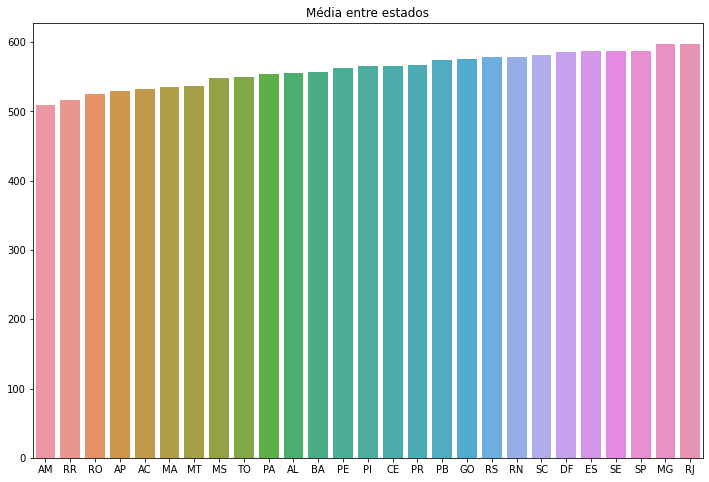

In [46]:
plt.figure(figsize=[12,8])
plt.title('Média entre estados')
sns.barplot(x,y);

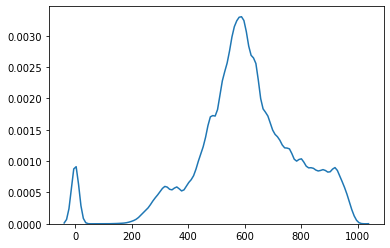

In [21]:
#distribuição das notas RJ
sns.distplot(data.filter((data.SG_UF_RESIDENCIA =='RJ')&(data.NU_NOTA_REDACAO>=0))['NU_NOTA_REDACAO'].to_numpy(),50, hist=False);

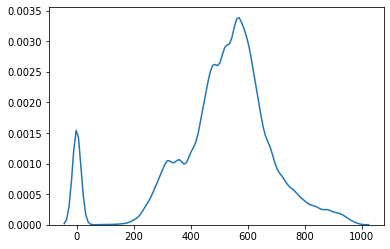

In [22]:
#distribuição das notas AM
sns.distplot(data.filter((data.SG_UF_RESIDENCIA =='AM')&(data.NU_NOTA_REDACAO>=0))['NU_NOTA_REDACAO'].to_numpy(),50, hist=False);

A curva da distribuição das notas está longe de ser uma curva normal, acredito que será bem difícil tentar trazer para esse formato. Sendo assim iremos remover os outliers através do IQR e adotar um teste de hipótese não paramétrico.

# IQR

In [23]:
#Definindo as variáveis
xr = np.sort(data.filter((data.SG_UF_RESIDENCIA =='RJ')&(data.NU_NOTA_REDACAO>=0))['NU_NOTA_REDACAO'].to_numpy())
xa = np.sort(data.filter((data.SG_UF_RESIDENCIA =='AM')&(data.NU_NOTA_REDACAO>=0))['NU_NOTA_REDACAO'].to_numpy())
len(xr), len(xa)

(259279, 81209)

In [24]:
#Definindo os valores de Q1 e Q3
Q1r = np.quantile(xr, 0.25)
Q3r = np.quantile(xr, 0.75)
Q1a = np.quantile(xa, 0.25)
Q3a = np.quantile(xa, 0.75)

In [25]:
#Definindo os valores de IQR
IQRr = Q3r - Q1r
IQRa = Q3a - Q1a

IQRr, IQRa

(200.0, 180.0)

In [26]:
#Limites inferior e superior
lower_limitr = Q1r - 1.5*IQRr
upper_limitr = Q3r + 1.5*IQRr
lower_limita = Q1a - 1.5*IQRa
upper_limita = Q3a + 1.5*IQRa
lower_limitr, upper_limitr, lower_limita, upper_limita

(220.0, 1020.0, 170.0, 890.0)

In [27]:
#Removendo os outliers
r = data.filter((data.SG_UF_RESIDENCIA =='RJ') & (data.NU_NOTA_REDACAO>lower_limitr) & (data.NU_NOTA_REDACAO<upper_limitr))['NU_NOTA_REDACAO'].to_numpy()
a = data.filter((data.SG_UF_RESIDENCIA =='AM') & (data.NU_NOTA_REDACAO>lower_limita) & (data.NU_NOTA_REDACAO<upper_limita))['NU_NOTA_REDACAO'].to_numpy()
len(r), len(a)

(250448, 75377)

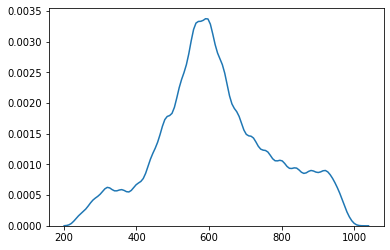

In [30]:
#Nova distribuição RJ
sns.distplot(r, hist=False);


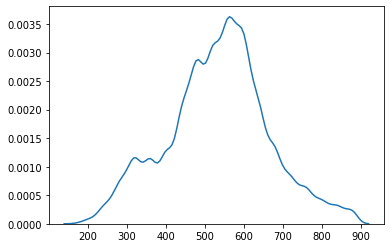

In [29]:
#Nova distribuição AM
sns.distplot(a, hist=False);

Na comparação entre as distribuições ao invés de usarmos toda a população, colheremos 60000 pontos de dados de forma randômica. É imprescindível que as amostras possuam carcterísticas estatísticas extremamente próximas às de suas populações.

In [31]:
#Colhendo amostras randômicas de tamanhos iguais
r2 = np.random.choice(r, size=60000)
a2 = np.random.choice(a, size=60000)

len(r2), len(a2)

(60000, 60000)

Comparação estatística população X amostra Rio de Janeiro

In [32]:
pd.DataFrame(index=pd.DataFrame(r).describe().index,data={'r':pd.DataFrame(r).describe()[0].values,'r2':pd.DataFrame(r2).describe()[0].values})     

,r,r2
count,250448.000000,60000.000000
mean,618.216875,617.152667
std,157.435437,157.178957
min,240.000000,240.000000
25%,520.000000,520.000000
50%,600.000000,600.000000
75%,720.000000,720.000000
max,1000.000000,1000.000000


Comparação estatística população X amostra Amazonas

In [33]:
pd.DataFrame(index=pd.DataFrame(a).describe().index,data={'a':pd.DataFrame(a).describe()[0].values,'a2':pd.DataFrame(a2).describe()[0].values})     

,a,a2
count,75377.000000,60000.000000
mean,534.841397,534.848000
std,130.093310,130.096652
min,180.000000,180.000000
25%,460.000000,460.000000
50%,540.000000,540.000000
75%,620.000000,620.000000
max,880.000000,880.000000


# Mann Whitney
O teste de hipótese nos mostra que as distribuições seguem padrões diferentes. Sendo assim podemos confirmar que o estado do Rio de Janeiro obteve um desempenho melhor em relação ao estado do Amazonas

In [34]:

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(r2, a2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Distribuições iguais (H0 não rejeitado)')
else:
    print('Distribuições diferentes (H0 rejeitado)')

Statistics=1254244043.000, p=0.000
Distribuições diferentes (H0 rejeitado)


# Quantidade de membros na residência

Embora os dois estados não apresentem uma relação linear clara entre a nota e a quantidade de membros em casa, podemos perceber que o estado do Amazonas é mais sensível a esses números do que o estado do Rio.
Um fato curioso é que embora o Rio possua quase 3 vezes mais candidatos, o Amazonas possui muito mais candidatos cujo o número total de membros na residência é de 7 ou mais.

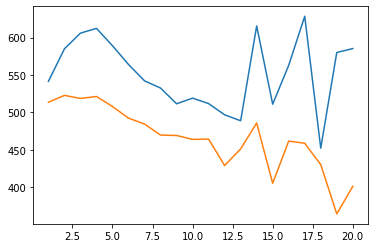

In [35]:
plt.plot(data.filter(data.SG_UF_RESIDENCIA == 'RJ')['Q005','NU_NOTA_REDACAO'].to_pandas_df().groupby(['Q005'])['NU_NOTA_REDACAO'].mean());
plt.plot(data.filter(data.SG_UF_RESIDENCIA == 'AM')['Q005','NU_NOTA_REDACAO'].to_pandas_df().groupby(['Q005'])['NU_NOTA_REDACAO'].mean());

In [47]:
#quantidade de membros
rp = pd.DataFrame(index=data.filter(data.SG_UF_RESIDENCIA == 'RJ')['Q005'].value_counts().index, data=data.filter(data.SG_UF_RESIDENCIA == 'RJ')['Q005'].value_counts().values).sort_index()
ap = pd.DataFrame(index=data.filter(data.SG_UF_RESIDENCIA == 'AM')['Q005'].value_counts().index, data=data.filter(data.SG_UF_RESIDENCIA == 'AM')['Q005'].value_counts().values).sort_index()
pd.DataFrame(data={'nº membros':np.arange(1,21),'Rio de Janeiro':rp[0],'Amazonas':ap[0]})

,nº membros,Rio de Janeiro,Amazonas
1,1,10128,2876
2,2,53157,11432
3,3,98723,22234
4,4,107894,30165
5,5,45353,22640
6,6,14832,12451
7,7,5188,7371
8,8,2016,4174
9,9,694,1875
10,10,390,1488


# Renda familiar mensal

In [37]:
#traduzindo as respostas da questão Q006
dicr= { 'A':'Nenhuma renda.',
        'B':'Até R$ 998,00.',
        'C':'De R$ 998,01 até R$ 1.497,00.',
        'D':'De R$ 1.497,01 até R$ 1.996,00.',
        'E':'De R$ 1.996,01 até R$ 2.495,00.',
        'F':'De R$ 2.495,01 até R$ 2.994,00.',
        'G':'De R$ 2.994,01 até R$ 3.992,00.',
        'H':'De R$ 3.992,01 até R$ 4.990,00.',
        'I':'De R$ 4.990,01 até R$ 5.988,00.',
        'J':'De R$ 5.988,01 até R$ 6.986,00.',
        'K':'De R$ 6.986,01 até R$ 7.984,00.',
        'L':'De R$ 7.984,01 até R$ 8.982,00.',
        'M':'De R$ 8.982,01 até R$ 9.980,00.',
        'N':'De R$ 9.980,01 até R$ 11.976,00.',
        'O':'De R$ 11.976,01 até R$ 14.970,00.',
        'P':'De R$ 14.970,01 até R$ 19.960,00.',
        'Q':'Mais de R$ 19.960,00.'
      }

def qur(v1):
    data[v1]=data[v1].map(dicr)
    
qur('Q006')

In [38]:
d = data.filter(data.NU_NOTA_REDACAO >=0)['Q006','NU_NOTA_REDACAO'].groupby('Q006', vx.agg.mean).sort('NU_NOTA_REDACAO_mean')

Percebemos outra relação direta, quanto maior a renda mensal da família do candidato, maior tende ser sua nota.

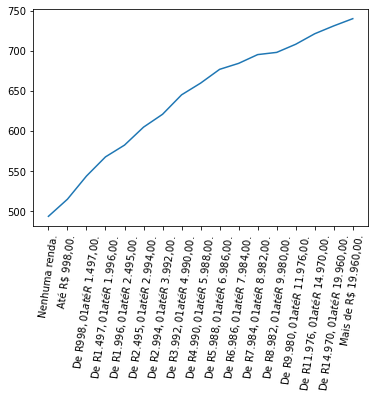

In [39]:
plt.xticks(rotation=82)
plt.plot(d['Q006'].values,d.values);

In [40]:
percj=[]
for i in data.filter((data.NU_NOTA_REDACAO >=0)&(data.SG_UF_RESIDENCIA=='RJ'))['Q006'].value_counts().values:
    p = (i*100)/259279
    percj.append(p)


In [41]:
perc=[]
for i in data.filter((data.NU_NOTA_REDACAO >=0)&(data.SG_UF_RESIDENCIA=='AM'))['Q006'].value_counts().values:
    p = (i*100)/81209
    perc.append(p)


Através da tabela abaixo é possível perceber que no estado do Amazonas a concentração das rendas mais inferiores é maior, enquanto o Rio possui uma concentração de rendas maiores maior.
Isso nos mostra o quanto o país ainda é desigual nesse quesito e que ainda temos um caminho longo pela frente antes que todos os cidadãos possam ser beneficiados com as mesmas opotunidades.

In [42]:
pd.DataFrame(data={'renda_RJ':data.filter((data.NU_NOTA_REDACAO >=0)&(data.SG_UF_RESIDENCIA=='RJ'))['Q006'].value_counts().index,'%_RJ':percj,
'renda_AM':data.filter((data.NU_NOTA_REDACAO >=0)&(data.SG_UF_RESIDENCIA=='AM'))['Q006'].value_counts().index,'%_AM':perc})
                   

,renda_RJ,%_RJ,renda_AM,%_AM
0,"De R$ 998,01 até R$ 1.497,00.",25.183682,"Até R$ 998,00.",34.089818
1,"Até R$ 998,00.",15.758700,"De R$ 998,01 até R$ 1.497,00.",29.776256
2,"De R$ 1.497,01 até R$ 1.996,00.",11.092298,"De R$ 1.497,01 até R$ 1.996,00.",7.595217
3,"De R$ 1.996,01 até R$ 2.495,00.",10.267318,"De R$ 1.996,01 até R$ 2.495,00.",7.102661
4,"De R$ 2.994,01 até R$ 3.992,00.",6.790369,Nenhuma renda.,7.027546
5,"De R$ 2.495,01 até R$ 2.994,00.",5.312424,"De R$ 2.994,01 até R$ 3.992,00.",3.535322
6,"De R$ 3.992,01 até R$ 4.990,00.",4.888171,"De R$ 2.495,01 até R$ 2.994,00.",2.409831
7,"De R$ 4.990,01 até R$ 5.988,00.",3.713760,"De R$ 3.992,01 até R$ 4.990,00.",2.136463
8,Nenhuma renda.,2.869110,"De R$ 4.990,01 até R$ 5.988,00.",1.594651
9,"De R$ 5.988,01 até R$ 6.986,00.",2.371577,"De R$ 5.988,01 até R$ 6.986,00.",0.943245
